# Import Important Liabraries

In [1]:
import pandas as pd   
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

# Import Data set

In [29]:
warnings.filterwarnings("ignore")
df = pd.read_csv(r"C:\Users\sanch\OneDrive\Desktop\Data analyst course\Python 3.0\Projects\diabetes Predictive Analysis\data\diabetes.csv")

# Data OverView

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
352,3,61,82,28,0,34.4,0.243,46,0
553,1,88,62,24,44,29.9,0.422,23,0
124,0,113,76,0,0,33.3,0.278,23,1
569,0,121,66,30,165,34.3,0.203,33,1
141,5,106,82,30,0,39.5,0.286,38,0


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Correlation 

In [7]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: >

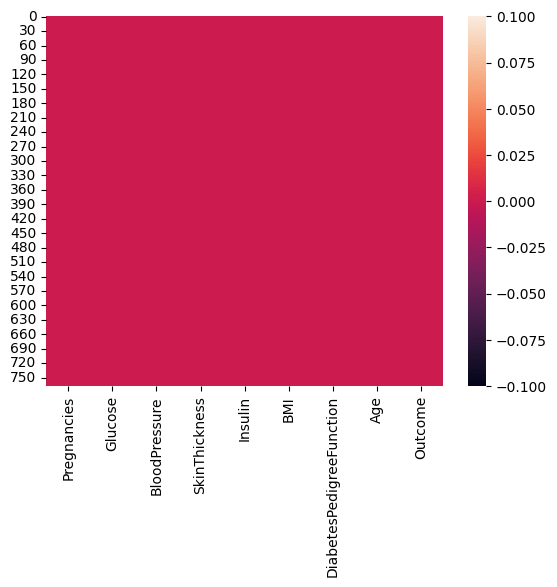

In [8]:
sns.heatmap(df.isnull())

In [9]:
correlation = df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

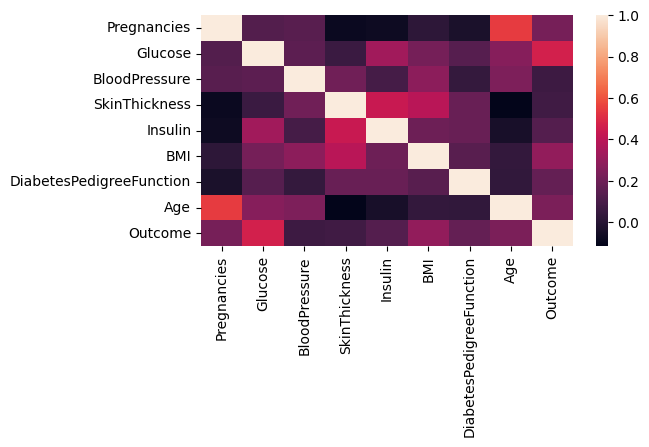

In [10]:
plt.figure(figsize=(6,3))
sns.heatmap(correlation)

# Training the test Model

In [32]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
x= df.drop("Outcome", axis=1) #independent var
y = df.Outcome #dependent
#------------------------------------------------------------------------------------------------

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size= 0.2, random_state=42)
#------------------------------------------------------------------------------------------------

model = LogisticRegression(max_iter = 300 )
model.fit(X_train, Y_train)
#------------------------------------------------------------------------------------------------ 

prediction = model.predict(X_test)
print(prediction)
#------------------------------------------------------------------------------------------------

accuracy = accuracy_score(prediction,Y_test)
print(accuracy)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
0.7467532467532467


In [21]:
prediction_train_data = model.predict(X_train)
accuracy_train_data = accuracy_score(prediction_train_data, Y_train)
print(accuracy_train_data)

0.7719869706840391


# Pridiction Model

In [26]:
new_data = np.asarray([4,110,92,0,0,37.6,0.191,30]).reshape(1,-1)
predict = model.predict(new_data)
print(predict)

if predict == 0:
    print('diabetes result is neg')
else :
    print('diabetes result is pos')
    

[0]
diabetes result is neg


In [35]:
name = input('Enter your name: ')
preg = int(input("Enter the number of Pregnancies: "))
glu = int(input("Enter your glucose: "))
bp = float(input("enter your BP: "))
st = int(input("Enter your ST: "))
ins = int(input("your Insulin: "))
bmi = float(input("your BMI: "))
dia = float(input("your DiabetesPedigreeFunction: "))
age = int(input("enter your age: "))
# ------------------------------------------------------------------------------------------------
cal = np.array([preg,glu,bp,st,ins,bmi,dia,age]).reshape(1,-1)
#------------------------------------------------------------------------------------------------


pre = model.predict(cal)
if pre[0] == 1:
    v = "positive"
else:
    v = "negative"


print(f"\nHi, {name}!\nYour diabetes result is {v}")


Enter your name: neha
Enter the number of Pregnancies: 2
Enter your glucose: 71
enter your BP: 70
Enter your ST: 27
your Insulin: 0
your BMI: 28
your DiabetesPedigreeFunction: .586
enter your age: 22

Hi, neha!
Your diabetes result is negative


In [ ]:
2	71	70	27	0	28.0	0.586	22	  answer = 0